<a href="https://colab.research.google.com/github/ev1025/CP1/blob/main/Code_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인스타카트 데이터 분석

참고자료 : 케글 인스타카트 장바구니 분석 데이터     
https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis

# 1. CRISP-DM 기반 분석

## 1) 비즈니스이해

## 2) 데이터 이해

## 3) 데이터 전처리

In [ ]:
# 한글 그래프 폰트(런타임재시작, plt.rc('font', family='NanumBarunGothic'))
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from functools import reduce

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/인스타카트/aisles.csv')               # 소분류
df2 = pd.read_csv('/content/drive/MyDrive/인스타카트/departments.csv')          # 대분류
df3 = pd.read_csv('/content/drive/MyDrive/인스타카트/order_products__train.csv')
df4 = pd.read_csv('/content/drive/MyDrive/인스타카트/orders.csv')
df5 = pd.read_csv('/content/drive/MyDrive/인스타카트/products.csv')

In [ ]:
df3.shape

(1384617, 4)

In [ ]:
df1.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [ ]:
df2.isnull().sum()

department_id    0
department       0
dtype: int64

In [ ]:
df3.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
df4.isnull().sum()# 현재 주문 이전 주문과의 텀(데이터 유지)

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
df5.isnull().sum() 

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [ ]:
# 한 번에 merge 각 컬럼이 달라서 실패
# data = [df3,df1,df2,df5,df6]
# full_data = reduce(lambda x,y : pd.merge(x,y), data)

In [ ]:
# 데이터 합치는 함수
def df_merge(t1,t2,t3,t4,t5):
    data = pd.merge(t1,t2)
    data = pd.merge(data,t3)
    data = pd.merge(data,t4)
    data = pd.merge(data,t5)
    return data

In [ ]:
full_data = df_merge(df3,df4,df5,df1,df2)
full_data

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3283540,39484,23,1,103639,train,7,0,20,6.0,Sliced Turkey Feast in Gravy Cat Food,41,8,cat food care,pets
1384613,3339757,24892,1,1,157916,train,4,2,6,22.0,Wild Mackerel & Whitefish Cat Food,41,8,cat food care,pets
1384614,3343813,24892,9,0,43638,train,10,2,15,22.0,Wild Mackerel & Whitefish Cat Food,41,8,cat food care,pets
1384615,3343813,27290,10,0,43638,train,10,2,15,22.0,Purrfect Delicacies Wet Cat Food Flaked Oceanf...,41,8,cat food care,pets


In [ ]:
# 그래프분석에 사용할 데이터 만들기
df_graph = full_data[['order_id', 'user_id','product_name','aisle','department','order_number','reordered','order_dow','days_since_prior_order']]

In [ ]:
# 컬럼명 변경
def df_rename(data):
    data.columns = ['주문번호','유저','제품','소분류','대분류','누적주문','재주문','요일','주문텀']
    return data

In [ ]:
df_graph = df_rename(df_graph)
df_graph = df_graph.sort_values(by='주문번호',ignore_index=True)

In [ ]:
# CSV로 저장
# df_graph.to_csv('file.csv',index=False)

#### 분석

In [ ]:
df_graph.groupby('제품')['주문텀'].max().sort_values(ascending=False).dropna()

제품
#2 Coffee Filters                                        30.0
Organic Lowatf Plain Yogurt                              30.0
Organic Mandarins                                        30.0
Organic Maitake Mushrooms                                30.0
Organic Magnolia and Poppy Scented Glass Cleaner         30.0
                                                         ... 
Aromafier Diffuser, Grey                                  0.0
Medium Picture Hanging Strips                             0.0
Hershey's Chocolate/Strawberry                            0.0
Gallon Size Single Slide Storage Bags                     0.0
Dairy Free 5X Protein Almond Plus Vanilla Almond Milk     0.0
Name: 주문텀, Length: 39123, dtype: float64

In [ ]:
# 대분류 순위
df_graph['대분류'].value_counts(normalize=True)

produce            0.295451
dairy eggs         0.156759
snacks             0.085845
beverages          0.082366
frozen             0.072530
pantry             0.058675
bakery             0.034951
canned goods       0.033799
deli               0.031988
dry goods pasta    0.027959
household          0.025990
meat seafood       0.021888
breakfast          0.021306
personal care      0.015578
babies             0.010791
international      0.008596
missing            0.005959
alcohol            0.004043
pets               0.003248
other              0.001296
bulk               0.000981
Name: 대분류, dtype: float64

In [ ]:
count_depart = df_graph['대분류'].value_counts()
count_depart = count_depart.to_frame()
count_depart.reset_index(inplace=True)
count_depart.columns = ['대분류','개수']

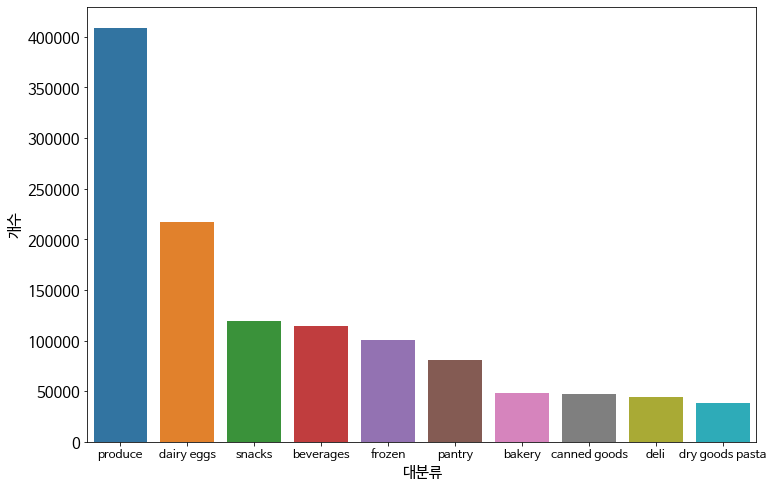

In [ ]:
plt.rc('font', size= 15, family='NanumBarunGothic')
plt.rc('xtick',labelsize=12)

plt.figure(figsize =(12,8))
sns.barplot(data=count_depart[:10],x='대분류',y='개수')

plt.show()

In [ ]:
# 대분류 produce의 제품목록
df_graph[df_graph['대분류']=='produce']['제품'].value_counts()

Banana                                              18726
Bag of Organic Bananas                              15480
Organic Strawberries                                10894
Organic Baby Spinach                                 9784
Large Lemon                                          8135
                                                    ...  
Mamey                                                   1
Fresh Sweet Corn                                        1
Curly Mustard Greens Bunch                              1
Junami Apple                                            1
Baby Food Blueberry, Parsnip & Buckwheat Stage 2        1
Name: 제품, Length: 1533, dtype: int64

In [ ]:
df_graph.groupby(['요일','대분류'])['유저'].count().loc[0]

대분류
alcohol               713
babies               3486
bakery              11237
beverages           22561
breakfast            6619
bulk                  307
canned goods        11656
dairy eggs          50756
deli                10589
dry goods pasta      9505
frozen              23033
household            7453
international        2995
meat seafood         7804
missing              2042
other                 373
pantry              18386
personal care        4685
pets                  888
produce            104085
snacks              24853
Name: 유저, dtype: int64

In [ ]:
product_count = df_graph['제품'].value_counts()
product_count

Banana                                                               18726
Bag of Organic Bananas                                               15480
Organic Strawberries                                                 10894
Organic Baby Spinach                                                  9784
Large Lemon                                                           8135
                                                                     ...  
Almond Stuffed Green Olives                                              1
Petite Creme Lowfat Strawberry Yogurt                                    1
Organic Petite Creme Mon Cherry Amour Yogurt                             1
Greek 100 Calories Whips! Peaches 'n Cream Fat Free Yogurt Mousse        1
Plain Golden Toasted Bread Crumbs                                        1
Name: 제품, Length: 39123, dtype: int64

In [ ]:
top_5 = product_count[:5].to_frame().reset_index()

In [ ]:
top_5.rename(columns={'index':'제품명'},inplace=True)

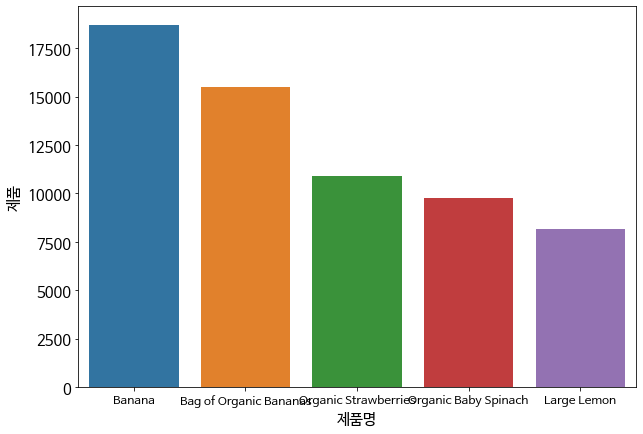

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data = top_5, x='제품명',y='제품')
plt.show()

In [ ]:
# 재주문이 많은 제품 top20
df_graph.groupby('제품')['재주문'].sum().sort_values(ascending=False).head(20)

제품
Banana                        16557
Bag of Organic Bananas        13362
Organic Strawberries           8603
Organic Baby Spinach           8055
Organic Avocado                6226
Organic Hass Avocado           6042
Large Lemon                    5923
Strawberries                   4786
Organic Raspberries            4279
Limes                          4234
Organic Whole Milk             4174
Organic Blueberries            3384
Organic Zucchini               3266
Organic Yellow Onion           3094
Organic Garlic                 3041
Organic Cucumber               3007
Seedless Red Grapes            2869
Organic Grape Tomatoes         2727
Sparkling Water Grapefruit     2662
Honeycrisp Apple               2655
Name: 재주문, dtype: int64

In [ ]:
df_graph['소분류'].value_counts(normalize=True)

fresh vegetables              0.108773
fresh fruits                  0.108675
packaged vegetables fruits    0.056689
yogurt                        0.039896
packaged cheese               0.030116
                                ...   
kitchen supplies              0.000324
baby bath body care           0.000237
baby accessories              0.000221
frozen juice                  0.000212
beauty                        0.000207
Name: 소분류, Length: 134, dtype: float64

In [ ]:
df_days = df_graph.groupby('요일')['유저'].count()
df_days = df_days.to_frame()
df_days.reset_index(inplace=True)
df_days

,요일,유저
0,0,324026
1,1,205978
2,2,160562
3,3,154381
4,4,155481
5,5,176910
6,6,207279


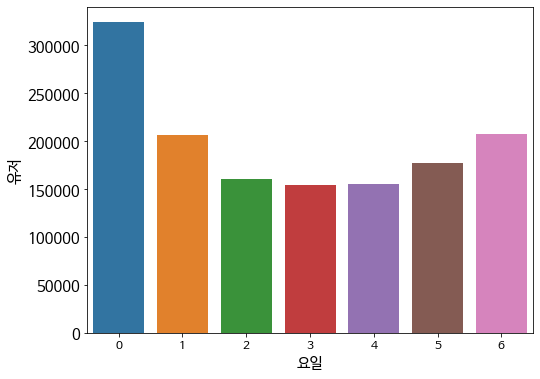

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data = df_days, x=df_days['요일'],y= df_days['유저'] )

In [ ]:
day_depart = df_graph.groupby('요일')['대분류'].value_counts()
day_depart = day_depart.to_frame()
day_depart

대분류
요일 대분류               
0  produce     104085
   dairy eggs   50756
   snacks       24853
   frozen       23033
   beverages    22561
...               ...
6  missing       1372
   pets           816
   alcohol        765
   other          285
   bulk           192

[147 rows x 1 columns]

In [ ]:
day_depart.loc[0]

,대분류
대분류,
produce,104085
dairy eggs,50756
snacks,24853
frozen,23033
beverages,22561
pantry,18386
canned goods,11656
bakery,11237
deli,10589


In [ ]:
day_aisles = df_graph.groupby('요일')['소분류'].value_counts()
day_aisles = day_aisles.to_frame()
day_aisles

소분류
요일 소분류                              
0  fresh vegetables            39998
   fresh fruits                37086
   packaged vegetables fruits  20244
   yogurt                      13398
   packaged cheese              9953
...                              ...
6  kitchen supplies               73
   frozen juice                   52
   baby bath body care            49
   beauty                         49
   baby accessories               45

[938 rows x 1 columns]

In [ ]:
day_aisles.loc[1]

,소분류
소분류,
fresh fruits,23013
fresh vegetables,22579
packaged vegetables fruits,11949
yogurt,8684
packaged cheese,6194
...,...
baby bath body care,45
baby accessories,41
specialty wines champagnes,40


## 4) 모델링

### 연관규칙분석(Association Rule)

In [ ]:
# 주문번호 별 주문 리스트 나누기(한 번 주문 할 때 어떤 물건을 같이 사는지 확인하기 위해서)

# 연관규칙분석을 위해 요소 비교를 하는 과정에서 시간이 오래걸려서 리스트 대신 array를 사용하였다.
# 하나의 iterator 요소간 비교에서 zip 함수를 사용 할 수 있었다.
# 마지막 열은 record에 append 되지 않는 점을 확인하여 if문을 하나 더 추가하여 마지막 열 추가

df_array = df_graph.values # 전체 데이터를 array화 하여 계산속도 증가

record = [] # 주문번호 별 주문내역리스트
record2 =[] # 한 주문에 포함 된 내역

for p1, p2 in zip(df_array, df_array[1:]): # 0과1 1과2 ... 비교하도록 for문 

    if p1[0]==p2[0]:              # 주문번호가 같으면 record2에 추가
        record2.append(p1[2])

        if p1[2]==df_array[-2][2]: # 전체데이터의 마지막열에 도달하면 마지막 주문내역 record에 추가
            record2.append(p2[2])
            record.append(record2)
  
    else:
        record2.append(p1[2])    # 주문번호가 다르면 해당 주문의 마지막 물건이다. 주문번호 마지막 목록을 record2에 추가하고
        record.append(record2)   # 해당 주문을 그룹화한 record2를 record에 추가하고
        record2 = []             # record2를 초기화

In [ ]:
# 같은 주문번호끼리 list
record[0]

['Bulgarian Yogurt',
 'Lightly Smoked Sardines in Olive Oil',
 'Organic Celery Hearts',
 'Organic Whole String Cheese',
 'Organic Hass Avocado',
 'Bag of Organic Bananas',
 'Organic 4% Milk Fat Whole Milk Cottage Cheese',
 'Cucumber Kirby']

In [ ]:
# 위에 record 확인용
df_graph.head(10)

,주문번호,유저,제품,소분류,대분류,누적주문,재주문,요일,주문텀
0,1,112108,Bulgarian Yogurt,yogurt,dairy eggs,4,1,4,9.0
1,1,112108,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,4,1,4,9.0
2,1,112108,Organic Celery Hearts,fresh vegetables,produce,4,0,4,9.0
3,1,112108,Organic Whole String Cheese,packaged cheese,dairy eggs,4,1,4,9.0
4,1,112108,Organic Hass Avocado,fresh fruits,produce,4,0,4,9.0
5,1,112108,Bag of Organic Bananas,fresh fruits,produce,4,0,4,9.0
6,1,112108,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs,4,1,4,9.0
7,1,112108,Cucumber Kirby,fresh vegetables,produce,4,0,4,9.0
8,36,79431,Asparagus,fresh vegetables,produce,23,1,6,30.0
9,36,79431,Grated Pecorino Romano Cheese,specialty cheeses,dairy eggs,23,0,6,30.0


**surpport (지지도)**
- $P(A∩B)$ 
- A,B가 동시에 일어난 수 / 전체 거래 수
- A와 B가 동시에 거래되는 비중 

**confidence (신뢰도)**
- $P(A∩B)/P(A)$
- A,B가 동시에 일어난 수 / A가 일어난 수
- A를 포함하는 거래 중 A,B가 동시에 거래되는 비중

**lift(향상도)**
- $P(A∩B) / P(A)*P(B)$  = $P(B|A) / P(B)$
- A,B가 동시에 일어난 수 / 독립된 A * 독립된 B
- AB, AC가 같은 신뢰도를 가질 때, B와 C 중 어느것이 더 관련있는지
- (lift = 1) 독립 / (lift > 1) 양의 상관관계 / (lift < 1) 음의 상관관계  

> **Tip**   
1. 지지도,신뢰도, 향상도가 모두 높다 = 좋은 rule
2. 지지도가 낮고 신뢰와 향상도가 높다 = 실효성이 떨어짐


#### **apriori공식문서** : http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(record).transform(record) # fit = 고유한 라벨을 갖게됨 / transform = 원핫인코딩,numpy배열로 전환
ap_data = pd.DataFrame(te_ary,columns=te.columns_) # 원핫 인코딩 된 데이터프레임으로 변환

In [ ]:
# 주문당 평균 10건 주문 -> 주문건당 혜택?
mean_order =[te_ary[i].sum() for i in range(len(te_ary))]
np.mean(mean_order) 

10.622537348184979

In [ ]:
# 지지도가 0.1% 이상인 데이터 출력
# 데이터용량이 커서 메모리부족현상발생 ->FP-growth 알고리즘 사용
from mlxtend.frequent_patterns import apriori, association_rules

# frequent_itemsets = apriori(ap_data, min_support=0.1, use_colnames=True)
# frequent_itemsets

In [ ]:
# association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

#### FP-growth Algorithm

In [ ]:
# %pip install mlxtend --upgrade

In [ ]:
# import에러 발생하여 mlxtend 버전업그레이드 진행
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(ap_data, min_support=0.01, use_colnames=True)
result_chart = association_rules(result, metric='confidence',  min_threshold=0.01)

In [ ]:
result_chart

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.120506,0.057023,0.019348,0.160558,2.815674,0.012477,1.123338
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.057023,0.120506,0.019348,0.339305,2.815674,0.012477,1.331165
2,(Organic Hass Avocado),(Organic Strawberries),0.057023,0.084055,0.012100,0.212197,2.524502,0.007307,1.162657
3,(Organic Strawberries),(Organic Hass Avocado),0.084055,0.057023,0.012100,0.143955,2.524502,0.007307,1.101551
4,(Organic Baby Spinach),(Organic Hass Avocado),0.076634,0.057023,0.010057,0.131236,2.301451,0.005687,1.085423
5,(Organic Hass Avocado),(Organic Baby Spinach),0.057023,0.076634,0.010057,0.176370,2.301451,0.005687,1.121093
6,(Bag of Organic Bananas),(Organic Raspberries),0.120506,0.042865,0.013940,0.115682,2.698751,0.008775,1.082342
7,(Organic Raspberries),(Bag of Organic Bananas),0.042865,0.120506,0.013940,0.325215,2.698751,0.008775,1.303369
8,(Organic Strawberries),(Organic Raspberries),0.084055,0.042865,0.012896,0.153427,3.579306,0.009293,1.130599
9,(Organic Raspberries),(Organic Strawberries),0.042865,0.084055,0.012896,0.300859,3.579306,0.009293,1.310100


### k-means

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_model = df_graph[['누적주문','주문텀']].dropna()
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(df_model)

In [61]:
k = 5
model = KMeans(n_clusters=k, random_state=12)
model.fit(sc_data)

KMeans(n_clusters=5, random_state=12)

In [62]:
df_graph['cluster'] = model.fit_predict(sc_data)

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


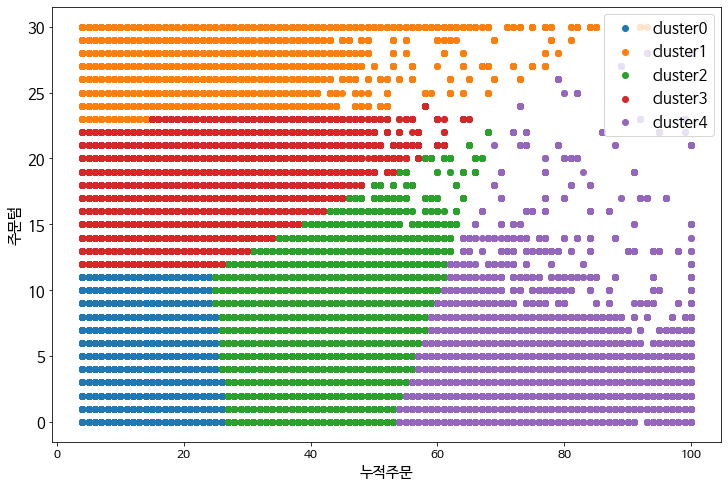

In [63]:
plt.figure(figsize=(12,8))
for i in range(k):
    plt.scatter(df_graph.loc[df_graph['cluster']==i, '누적주문'], 
                df_graph.loc[df_graph['cluster']==i, '주문텀'], 
                label = 'cluster'+str(i))
plt.xlabel('누적주문')
plt.ylabel('주문텀')
plt.legend()
plt.show()

## 5) 평가

## 6) 배포